Library

In [1]:
import pandas as pd
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
import joblib 

Read Data

In [2]:
df_wine = pd.read_csv('WineQT.csv')
df_wine

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,1
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,2
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,3
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1138,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,1592
1139,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6,1593
1140,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,1594
1141,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,1595


In [3]:
df_wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
 12  Id                    1143 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 116.2 KB


In [4]:
df_wine['quality'].value_counts()

quality
5    483
6    462
7    143
4     33
8     16
3      6
Name: count, dtype: int64

Independent Dependent Variable

In [5]:
x = df_wine.iloc[:,0:11].values
y = df_wine.iloc[:,11].values

Split Train Test

In [6]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=0)

Create Model & Training

In [7]:
nb_clf = GaussianNB()
nb_clf.fit(x_train,y_train)

,priors,None
,var_smoothing,1e-09


Testing Model

In [8]:
y_prediksi = nb_clf.predict(x_test)
y_prediksi

array([5, 4, 5, 5, 5, 5, 5, 6, 6, 7, 5, 6, 5, 5, 6, 5, 6, 6, 5, 5, 7, 5,
       5, 5, 5, 5, 5, 6, 6, 6, 5, 5, 6, 7, 6, 5, 6, 5, 5, 6, 5, 6, 5, 6,
       5, 5, 6, 6, 7, 6, 5, 7, 5, 7, 5, 5, 5, 5, 5, 6, 6, 5, 6, 5, 5, 5,
       6, 5, 5, 6, 5, 5, 6, 7, 6, 7, 7, 7, 5, 6, 5, 5, 6, 6, 7, 5, 4, 3,
       5, 6, 7, 7, 4, 5, 6, 6, 5, 5, 5, 5, 4, 6, 8, 5, 6, 6, 5, 6, 6, 5,
       5, 6, 5, 7, 5, 6, 5, 7, 5, 6, 6, 5, 5, 6, 7, 6, 6, 7, 5, 6, 7, 6,
       5, 5, 3, 7, 5, 7, 5, 5, 6, 4, 7, 8, 6, 5, 6, 7, 8, 5, 6, 6, 6, 6,
       5, 5, 6, 7, 6, 4, 6, 7, 5, 6, 6, 5, 7, 5, 7, 6, 5, 5, 5, 6, 6, 7,
       6, 6, 5, 6, 5, 5, 6, 5, 5, 5, 6, 5, 5, 7, 7, 6, 5, 6, 6, 5, 5, 6,
       5, 6, 6, 6, 6, 7, 4, 5, 5, 4, 5, 5, 7, 6, 7, 7, 6, 5, 6, 7, 5, 6,
       6, 6, 5, 5, 6, 6, 8, 5, 5], dtype=int64)

Evaluasi Model

Test accuration :  0.611353711790393
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.25      0.29      0.27         7
           5       0.72      0.72      0.72       100
           6       0.62      0.54      0.58        92
           7       0.44      0.56      0.49        27
           8       0.25      0.50      0.33         2

    accuracy                           0.61       229
   macro avg       0.38      0.43      0.40       229
weighted avg       0.62      0.61      0.62       229



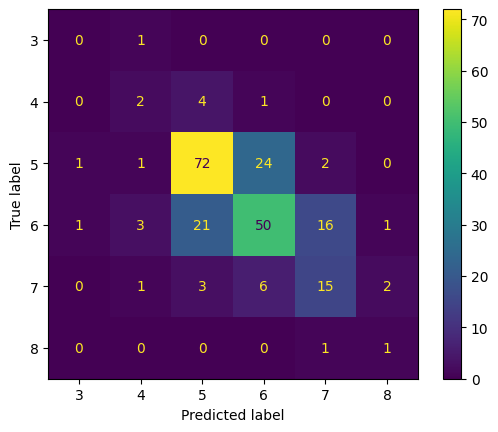

In [9]:
print("Test accuration : ", metrics.accuracy_score(y_test,y_prediksi))
print(metrics.classification_report(y_test,y_prediksi))
ConfusionMatrixDisplay.from_predictions(y_test,y_prediksi)

Save Model

In [10]:
joblib.dump(nb_clf, '../models/wine_nb.joblib')

['../models/wine_nb.joblib']

Test new data

In [11]:
input_data = [[7.4, 0.7, 0.0, 1.9, 0.076, 15.0, 21.0, 0.997, 3.2, 0.68, 9.4]]
prediksi_data = nb_clf.predict(input_data)
print("Predict Result : ",prediksi_data)

Predict Result :  [5]
